In [1]:
import os
import os.path as osp
from os.path import join as pjoin
import shutil
import time
from datetime import datetime
import json

import numpy as np
np.seterr(all='raise')
from PIL import Image

from lpf.data import load_model_dicts
from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [2]:
batch_size = 1  # A single set of parameters
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 500000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

# Color parameters
thr_color = 0.5

In [3]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [4]:
# To test the batch processing, add a single dict repeatedly.
param_dict = {
    "u0": 2.26149602133276, "v0": 1.6635557745335625,
    "Du": 0.00027545326069340044, "Dv": 0.07983333454476473,
    "ru": 0.17999999999999997, "rv": 0.09116599746769462,
    "su": 0.0010010607170663603, "sv": 0.02448138845767171, 
    "k": 0.19096243208916244, 
    "mu": 0.08050631184429496     
}

In [5]:
# In this example, we use random positions for initializing u with u0.
for i in range(25):
    param_dict["init_pts_%d"%(i+1)] = (np.random.randint(0, height), np.random.randint(0, width))

In [6]:
param_dict

{'u0': 2.26149602133276,
 'v0': 1.6635557745335625,
 'Du': 0.00027545326069340045,
 'Dv': 0.07983333454476473,
 'ru': 0.17999999999999997,
 'rv': 0.09116599746769462,
 'su': 0.0010010607170663603,
 'sv': 0.02448138845767171,
 'k': 0.19096243208916244,
 'mu': 0.08050631184429496,
 'init_pts_1': (36, 72),
 'init_pts_2': (92, 60),
 'init_pts_3': (59, 33),
 'init_pts_4': (11, 55),
 'init_pts_5': (12, 73),
 'init_pts_6': (92, 43),
 'init_pts_7': (50, 26),
 'init_pts_8': (32, 32),
 'init_pts_9': (76, 51),
 'init_pts_10': (65, 22),
 'init_pts_11': (86, 47),
 'init_pts_12': (61, 101),
 'init_pts_13': (101, 81),
 'init_pts_14': (68, 70),
 'init_pts_15': (35, 127),
 'init_pts_16': (35, 73),
 'init_pts_17': (48, 8),
 'init_pts_18': (69, 70),
 'init_pts_19': (44, 66),
 'init_pts_20': (53, 66),
 'init_pts_21': (104, 39),
 'init_pts_22': (7, 108),
 'init_pts_23': (78, 14),
 'init_pts_24': (60, 29),
 'init_pts_25': (97, 59)}

In [7]:
param_dicts = []
param_dicts.append(param_dict)

In [8]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(param_dicts)
params = LiawModel.parse_params(param_dicts)

In [9]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [10]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    period_output=50000,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=1
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

- [Iteration #1] elapsed time: 1.09999e-02 sec.
- [Iteration #50000] elapsed time: 1.02103e+01 sec.
- [Iteration #100000] elapsed time: 1.03031e+01 sec.
- [Iteration #150000] elapsed time: 1.04447e+01 sec.
- [Iteration #200000] elapsed time: 1.05281e+01 sec.
- [Iteration #250000] elapsed time: 1.02927e+01 sec.
- [Iteration #300000] elapsed time: 1.02388e+01 sec.
- [Iteration #350000] elapsed time: 1.05047e+01 sec.
- [Iteration #400000] elapsed time: 1.01317e+01 sec.
- [Iteration #450000] elapsed time: 1.01872e+01 sec.
- [Iteration #500000] elapsed time: 1.02856e+01 sec.
- [Duration] : 1.03162e+02 sec.
Elapsed time: 103.161863 sec.


In [11]:
# Sub-directories in the output directory
!ls {dpath_output}

model_1
models


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1eff520bd60>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [12]:
# Generated images
dpath_images = pjoin(dpath_output, "model_1")
!ls {dpath_images}

ladybird_000001.png
ladybird_050000.png
ladybird_100000.png
ladybird_150000.png
ladybird_200000.png
ladybird_250000.png
ladybird_300000.png
ladybird_350000.png
ladybird_400000.png
ladybird_450000.png
ladybird_500000.png
pattern_000001.png
pattern_050000.png
pattern_100000.png
pattern_150000.png
pattern_200000.png
pattern_250000.png
pattern_300000.png
pattern_350000.png
pattern_400000.png
pattern_450000.png
pattern_500000.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1eff41c3160>


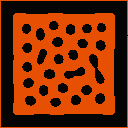

In [13]:
# Show the pattern at last.
img_pattern = Image.open(pjoin(dpath_images, "pattern_500000.png"))
img_pattern

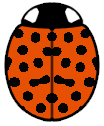

In [14]:
img_ladybird = Image.open(pjoin(dpath_images, "ladybird_500000.png"))
img_ladybird

In [15]:
# Model file
!ls {pjoin(dpath_output, "models")}

model_1.json


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1efc332c7c0>


In [16]:
fpath_model = pjoin(dpath_output, "models", "model_1.json")
with open(fpath_model, "rt") as fin:
    model_dict = json.load(fin)
    
model_dict

{'index': 0,
 'generation': None,
 'fitness': None,
 'Du': 0.00027545326069340045,
 'Dv': 0.07983333454476473,
 'ru': 0.17999999999999997,
 'rv': 0.09116599746769462,
 'k': 0.19096243208916244,
 'su': 0.0010010607170663603,
 'sv': 0.02448138845767171,
 'mu': 0.08050631184429496,
 'width': 128,
 'height': 128,
 'dx': 0.1,
 'thr_color': 0.5,
 'color_u': [5, 5, 5],
 'color_v': [231, 79, 3],
 'initializer': 'LiawInitializer',
 'u0': 2.26149602133276,
 'v0': 1.6635557745335625,
 'n_init_pts': 25,
 'init_pts_0': [36, 72],
 'init_pts_1': [92, 60],
 'init_pts_2': [59, 33],
 'init_pts_3': [11, 55],
 'init_pts_4': [12, 73],
 'init_pts_5': [92, 43],
 'init_pts_6': [50, 26],
 'init_pts_7': [32, 32],
 'init_pts_8': [76, 51],
 'init_pts_9': [65, 22],
 'init_pts_10': [86, 47],
 'init_pts_11': [61, 101],
 'init_pts_12': [101, 81],
 'init_pts_13': [68, 70],
 'init_pts_14': [35, 127],
 'init_pts_15': [35, 73],
 'init_pts_16': [48, 8],
 'init_pts_17': [69, 70],
 'init_pts_18': [44, 66],
 'init_pts_19': [